# Titanic Dataset 
## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.shape

(891, 11)

In [4]:
df.count()

survived    891
pclass      891
name        891
sex         891
age         714
sibsp       891
parch       891
ticket      891
fare        891
cabin       204
embarked    889
dtype: int64

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [6]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

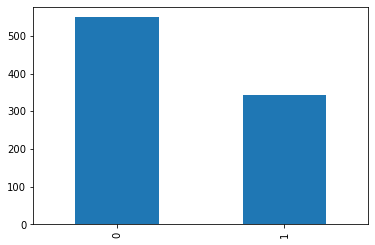

In [7]:
df.survived.value_counts().plot(kind="bar")
plt.show()

In [8]:
df.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

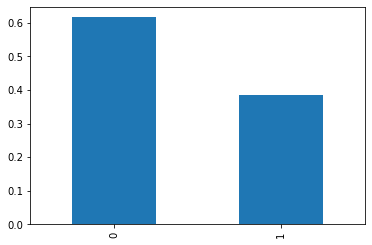

In [9]:
df.survived.value_counts(normalize=True).plot(kind='bar')

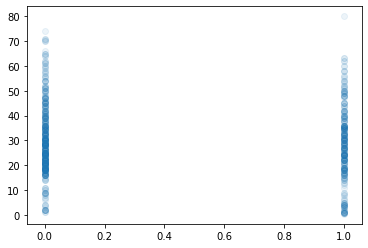

In [10]:
plt.scatter(df.survived, df.age, alpha=0.08)

In [11]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

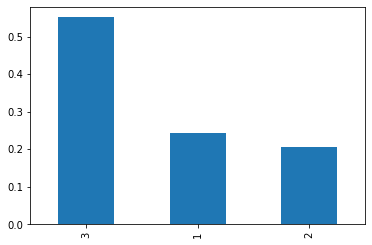

In [12]:
df.pclass.value_counts(normalize=True).plot(kind="bar")

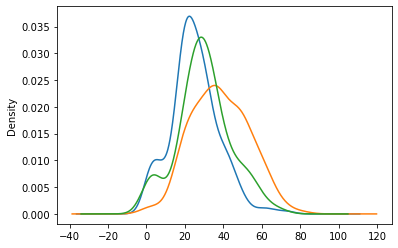

In [13]:
for x in df.pclass.unique():
    df.age[df.pclass == x].plot(kind="kde") # kernel density estimate plot

In [14]:
df.embarked.value_counts() # from which city they got on the ship

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [15]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [16]:
df.sibsp.value_counts() # siblings and spouse

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [17]:
df.survived[df.sex=='female'].value_counts()

1    233
0     81
Name: survived, dtype: int64

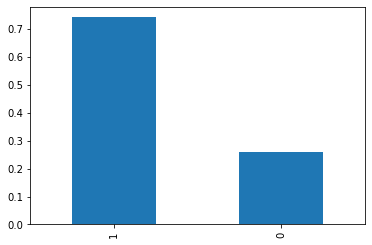

In [18]:
df.survived[df.sex=='female'].value_counts(normalize=True).plot(kind="bar")

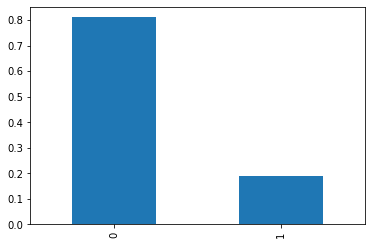

In [19]:
df.survived[df.sex=='male'].value_counts(normalize=True).plot(kind="bar")

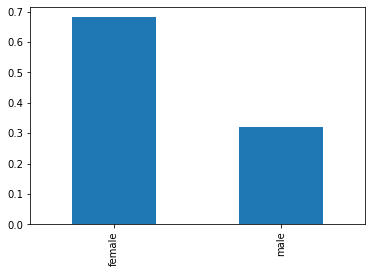

In [20]:
df.sex[df.survived==1].value_counts(normalize=True).plot(kind="bar")

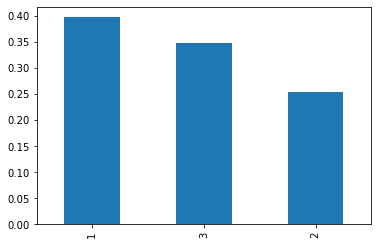

In [21]:
df.pclass[df.survived==1].value_counts(normalize=True).plot(kind="bar")

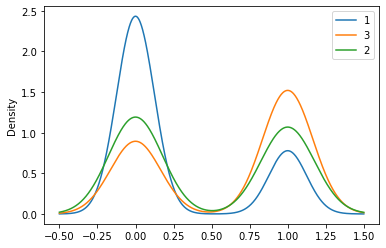

In [22]:
for x in df.pclass.unique():
    df.survived[df.pclass == x].plot(kind="kde") # kernel density estimate plot
    plt.legend(("1", "3", "2"))

Text(0.5, 1.0, 'First class male passengers')

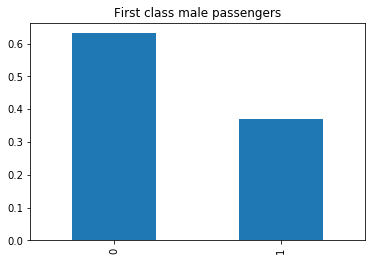

In [23]:
df.survived[(df.pclass==1) & (df.sex=="male")].value_counts(normalize=True).plot(kind='bar')
plt.title("First class male passengers")

Text(0.5, 1.0, 'First class female passengers')

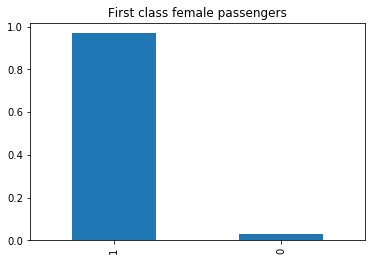

In [24]:
df.survived[(df.pclass==1) & (df.sex=="female")].value_counts(normalize=True).plot(kind='bar')
plt.title("First class female passengers")

Text(0.5, 1.0, 'Second class male passengers')

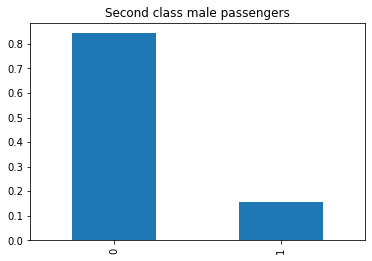

In [25]:
df.survived[(df.pclass==2) & (df.sex=="male")].value_counts(normalize=True).plot(kind='bar')
plt.title("Second class male passengers")

Text(0.5, 1.0, 'Second class female passengers')

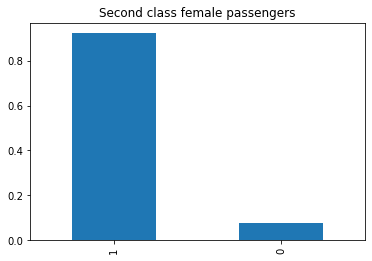

In [26]:
df.survived[(df.pclass==2) & (df.sex=="female")].value_counts(normalize=True).plot(kind='bar')
plt.title("Second class female passengers")

Text(0.5, 1.0, 'Third class male passengers')

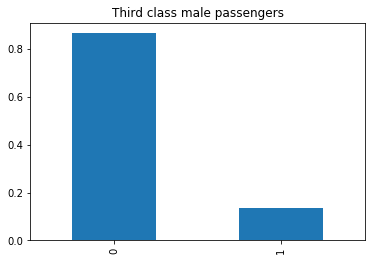

In [27]:
df.survived[(df.pclass==3) & (df.sex=="male")].value_counts(normalize=True).plot(kind='bar')
plt.title("Third class male passengers")

Text(0.5, 1.0, 'Third class female passengers')

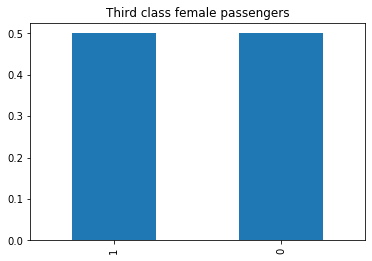

In [28]:
df.survived[(df.pclass==3) & (df.sex=="female")].value_counts(normalize=True).plot(kind='bar')
plt.title("Third class female passengers")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [30]:
df.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [31]:
len(df.name.unique())

891

In [32]:
df.cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
E101           3
              ..
B19            1
D50            1
B39            1
T              1
D47            1
Name: cabin, Length: 147, dtype: int64

In [33]:
del df['cabin']

In [34]:
df.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
embarked      2
dtype: int64

In [35]:
df['hypothesis'] = 0

In [36]:
df.loc[df.sex=="female", 'hypothesis'] = 1

In [37]:
df['result'] = False

In [38]:
df['result'] = (df.hypothesis == df.survived)

In [39]:
df.result.value_counts(normalize=True)

True     0.786756
False    0.213244
Name: result, dtype: float64

In [49]:
df['new_age'] = df['age']

In [53]:
df['new_age'] = df['new_age'].fillna(df['age'].median())

In [54]:
df.isna().sum()

survived        0
pclass          0
name            0
sex             0
age           177
sibsp           0
parch           0
ticket          0
fare            0
embarked        2
hypothesis      0
result          0
new_age         0
dtype: int64

In [55]:
df['new_age'].value_counts(normalize=True).head()

28.0    0.226712
24.0    0.033670
22.0    0.030303
18.0    0.029181
19.0    0.028058
Name: new_age, dtype: float64

In [56]:
df['age'].value_counts(normalize=True).head()

24.0    0.042017
22.0    0.037815
18.0    0.036415
19.0    0.035014
30.0    0.035014
Name: age, dtype: float64